In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/regression_model/data_all_proteins.csv', index_col=0)
df.head(2)

X = df[df.columns.difference(['Ln.K_f.'])]
y = df['Ln.K_f.']

# Visualising the data

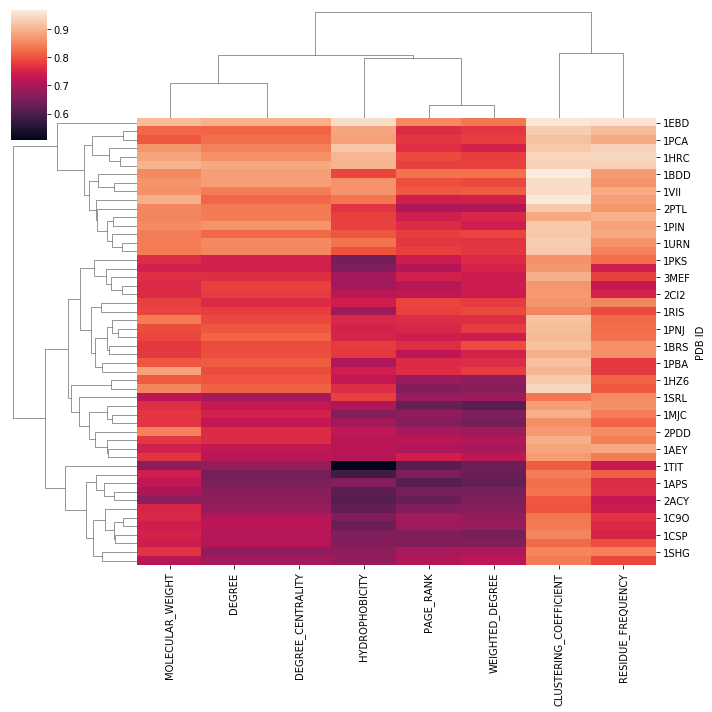

In [22]:
import seaborn as sns
sns.clustermap(X)

/home/divyanshu/anaconda3/envs/gsp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


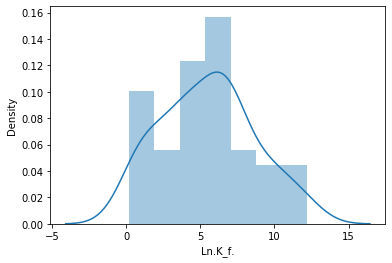

In [23]:
sns.distplot(y)

LinAlgError: 2-th leading minor of the array is not positive definite

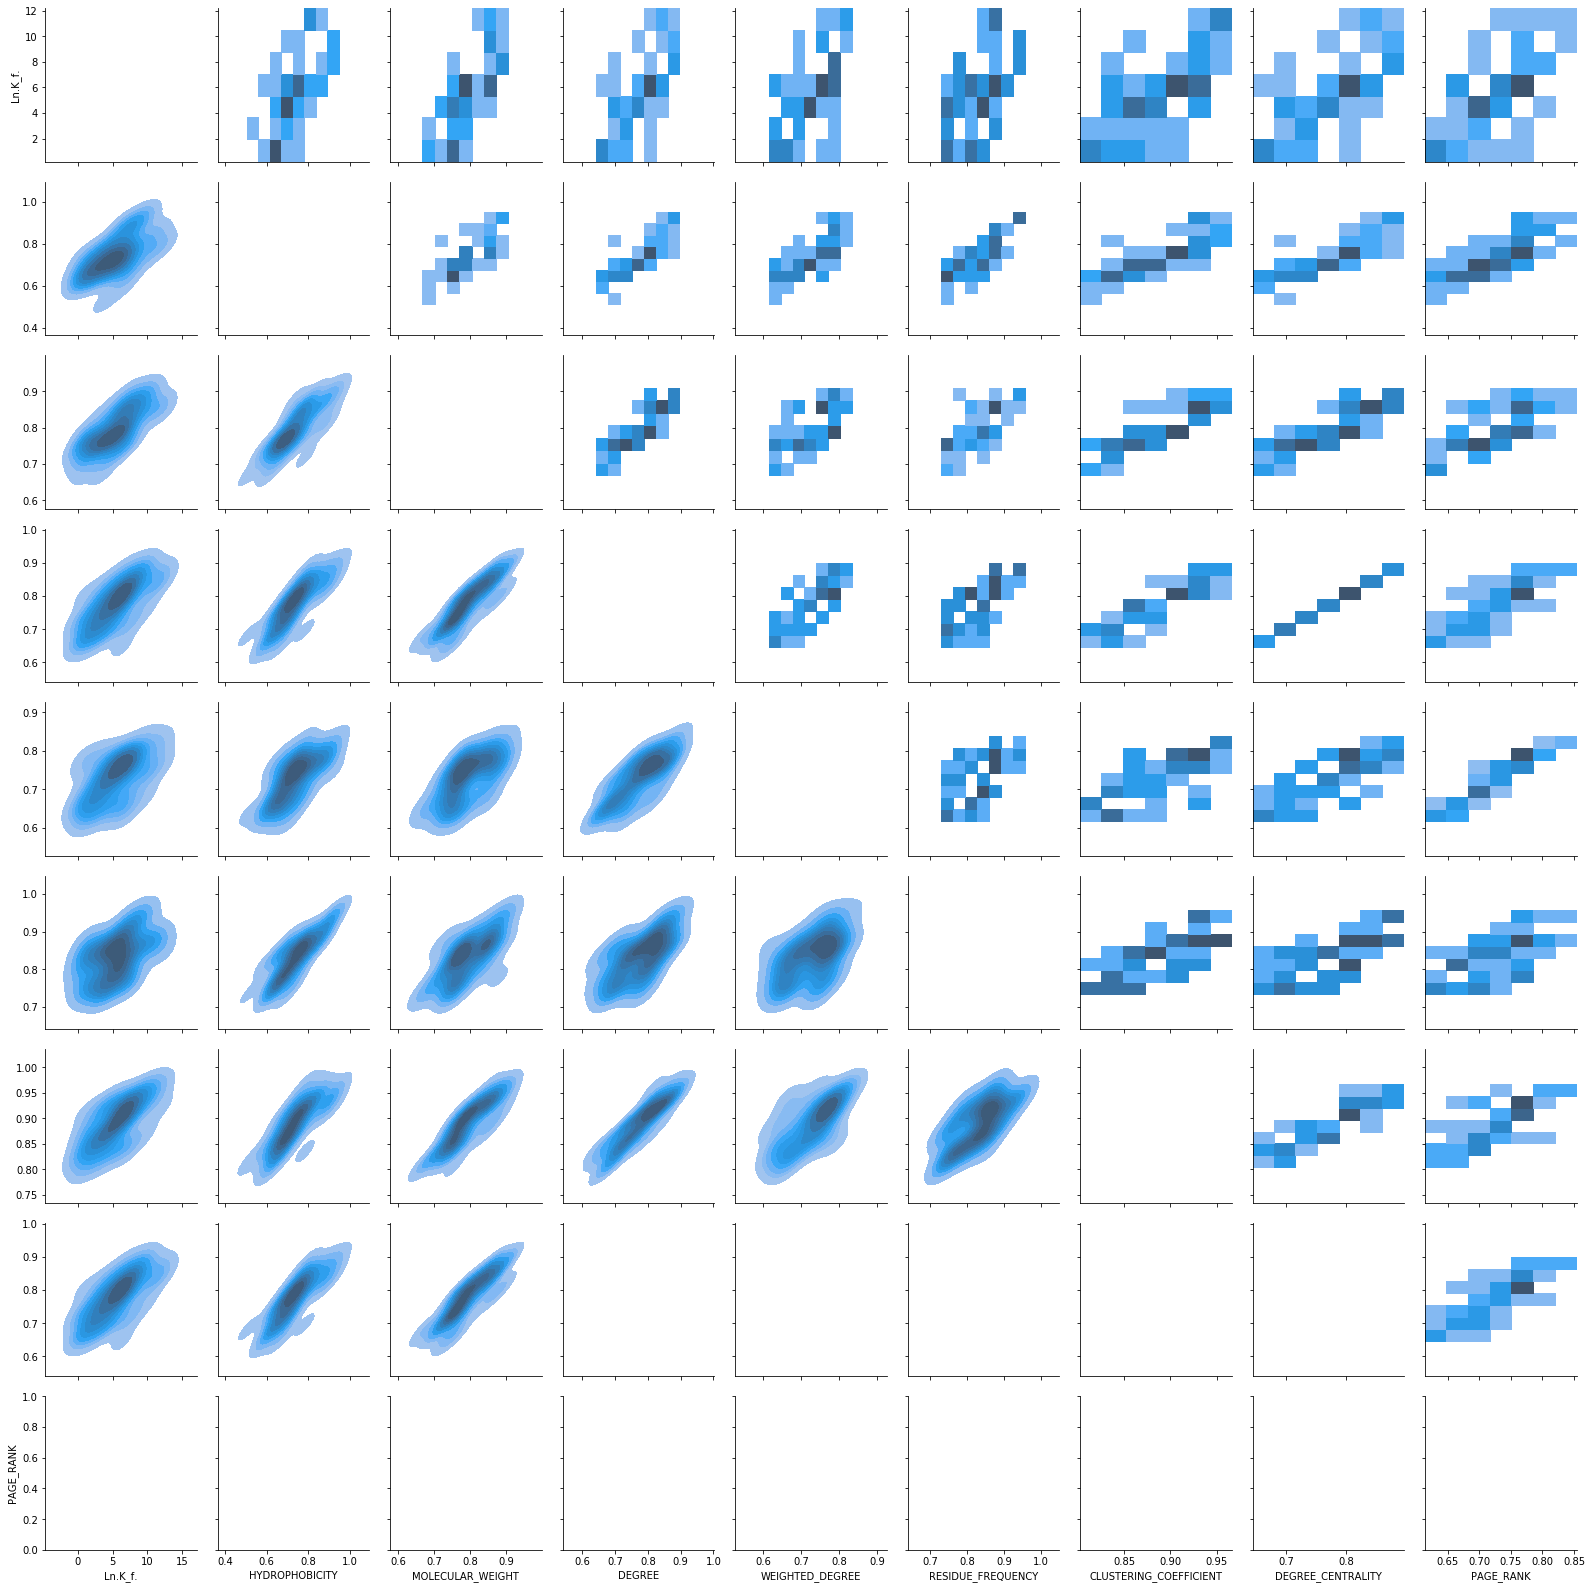

In [5]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

# Regression Analysis

In [40]:
X.index

Index(['1AEY', '1APS', '1AYE', '1BDD', '1BRS', '1C8C', '1C9O', '1CIS', '1COA',
       '1CSP', '1DIV', '1EBD', '1ENH', '1FKB', '1G6P', '1HDN', '1HRC', '1HZ6',
       '1IMQ', '1LMB', '1LOP', '1MJC', '1NYF', '1PBA', '1PCA', '1PGB', '1PIN',
       '1PKS', '1PNJ', '1POH', '1RIS', '1SHF', '1SHG', '1SRL', '1TEN', '1TIT',
       '1UBQ', '1URN', '1VII', '1VIK', '1WIT', '1YCC', '256B', '2ABD', '2ACY',
       '2AIT', '2CI2', '2HQI', '2PDD', '2PTL', '2VIK', '3MEF'],
      dtype='object', name='PDB ID')

In [61]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Linear Regression model

In [62]:
lr = LinearRegression()
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)

lr.fit(X, y)
lr.score(X, y)

0.611891901343667

In [63]:
lr.coef_

array([  2.26322823,  11.75802662,  -1.77119405,   3.10947281,
        20.71550461,  64.54443593, -12.20538787, -49.48782153])

In [64]:
lr.intercept_

-24.623744516981837

In [65]:
X.columns

Index(['BETWEENNESS_CENTRALITY', 'CLUSTERING_COEFFICIENT', 'DEGREE',
       'HYDROPHOBICITY', 'MOLECULAR_WEIGHT', 'PAGE_RANK', 'RESIDUE_FREQUENCY',
       'WEIGHTED_DEGREE'],
      dtype='object')

## Estimating error

In [77]:
from sklearn.metrics import *
print (np.sqrt(mean_squared_error(y, lr.predict(X))))
print (mean_absolute_error(y, lr.predict(X)))

print (mean_squared_error(y, lr.predict(X)))

1.9261055825226558
1.608384849654552
3.709882715024939


## Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=20, test_size=0.4, random_state=0)

# from sklearn.model_selection import cross_val_score
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.33 (+/- 0.31)


In [37]:
scores

array([ 0.35146995,  0.32785919,  0.42411123,  0.28788129,  0.13907113,
        0.30390182, -0.0375669 ,  0.14372481,  0.33071423,  0.13928051,
        0.50790666,  0.31244531,  0.34674608,  0.39710645,  0.63937938,
        0.37234697,  0.16365127,  0.46399076,  0.43164131,  0.5365739 ])

In [38]:
np.sqrt(scores.mean())

0.5736826363257421

## Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
# print ('Training set score: ', rfr.score(X_train, y_train))
print ('Testing set score: ', rfr.score(X_test, y_test))

# rfr.fit(X, y)
# print ('Entire set score: ', rfr.score(X, y))

Testing set score:  0.19706430838383193


# Lasso Regression

In [58]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

0.564183390414099

## Grid Search

### Randomized search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

base_model.fit(X_train, y_train)
print ('Base model: ', base_model.score(X_test, y_test))

best_random = rf_random.best_estimator_
print ('Best Random Model: ', best_random.score(X_test, y_test))

In [ ]:
rf_random.best_params_

# Mutation simulation 

In [78]:
folders

NameError: name 'folders' is not defined